# Import Library

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Data Wrangling

### Gathering Data

In [3]:
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [4]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

In [5]:
with engine.connect() as conn:
    print("Koneksi berhasil!")

Koneksi berhasil!


In [6]:
data_sales = pd.read_sql("SELECT * FROM sales", engine)

In [7]:
data_sales.head()

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### Assessing Data

In [8]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   order_date          1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [9]:
data_sales.describe(include='all')

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,348,7,2,NaN,NaN,NaN,3,2,5
top,NaN,2022-05-09,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,8,161,686,NaN,NaN,NaN,476,512,205
mean,500.500000,NaN,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,14.921744,4.413075,204.402979,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN


In [10]:
data_sales.isna().sum()

order_id              0
order_date            0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [11]:
data_sales.duplicated().sum()

np.int64(0)

### Cleaning Data

In [12]:
data_sales["order_date"] = pd.to_datetime(data_sales["order_date"])

# Exploratory Data Analysis

## Deskripsi Data

In [13]:
data_sales.describe(include='all')

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,7,2,NaN,NaN,NaN,3,2,5
top,NaN,NaN,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,NaN,161,686,NaN,NaN,NaN,476,512,205
mean,500.500000,2022-10-03 14:39:50.400000,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
min,1.000000,2022-04-01 00:00:00,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,2022-07-04 00:00:00,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,2022-10-07 12:00:00,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,2023-01-02 00:00:00,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN
max,1000.000000,2023-03-30 00:00:00,NaN,NaN,60.000000,15.000000,900.000000,NaN,NaN,NaN


## Persebaran Data Numerik

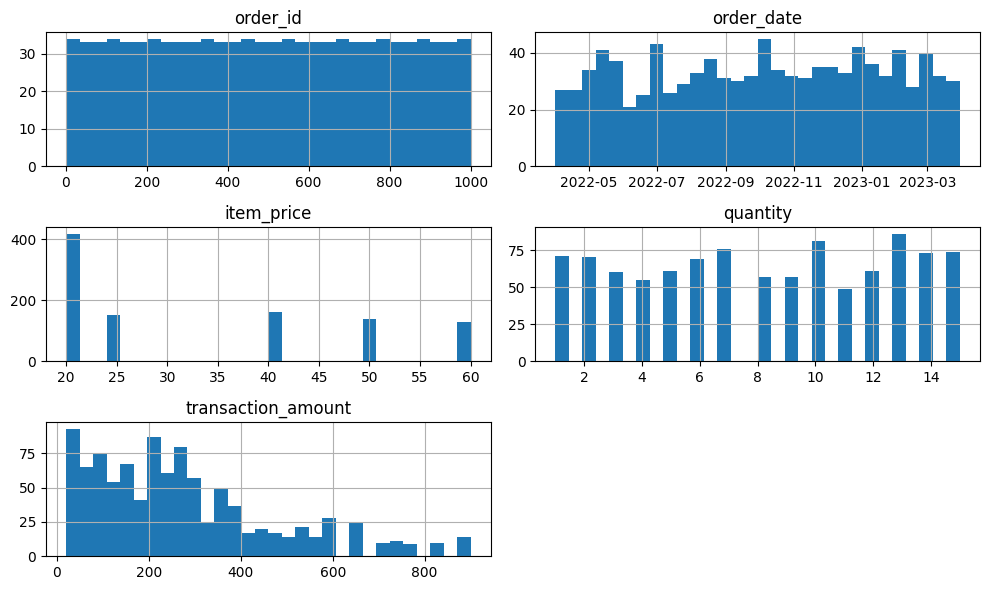

In [14]:
data_sales.hist(figsize=(10, 6), bins=30)
plt.tight_layout()
plt.show()

## Korelasi Antar Fitur Numerik

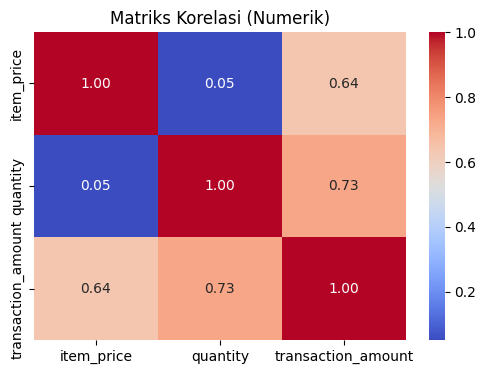

In [15]:
numerical_categories = ["item_price", "quantity", "transaction_amount"]
correlation_matrix = data_sales[numerical_categories].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi (Numerik)")
plt.show()

### Gambaran Umum Penjualan

#### Total Revenue

In [16]:
data_sales["transaction_amount"].sum()

np.int64(275230)

#### Total Order

In [17]:
data_sales["order_id"].nunique()

1000

#### Rata-rata Pendapatan per Order

In [18]:
data_sales["transaction_amount"].sum()/data_sales["order_id"].nunique()

np.float64(275.23)

### Analisis Produk

#### Jumlah Order per Produk

In [18]:
data_sales["item_name"].value_counts()

item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64

#### Pendapatan per Produk

In [19]:
data_sales.groupby("item_name")["transaction_amount"].sum().sort_values(ascending=False)

item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Aalopuri           20880
Vadapav            20120
Name: transaction_amount, dtype: int64

#### Jumlah Order per Jenis

In [20]:
data_sales.groupby('item_type')['order_id'].nunique()

item_type
Beverages    314
Fastfood     686
Name: order_id, dtype: int64

#### Pendapatan per Jenis

In [21]:
data_sales.groupby("item_type")["transaction_amount"].sum()

item_type
Beverages     86390
Fastfood     188840
Name: transaction_amount, dtype: int64

### Analisis Waktu

#### Jumlah Order per Waktu

In [22]:
data_sales.groupby("time_of_sale")["transaction_amount"].sum()

time_of_sale
Afternoon    56345
Evening      52355
Midnight     50725
Morning      53730
Night        62075
Name: transaction_amount, dtype: int64

### Analisis Metode Pembayaran

#### Jumlah Order per Metode Pembayaran

In [23]:
data_sales["transaction_type"].value_counts()

transaction_type
Cash       476
Online     417
Unknown    107
Name: count, dtype: int64

#### Pendapatan per Metode Pembayaran

In [24]:
data_sales.groupby("transaction_type")["transaction_amount"].sum()

transaction_type
Cash       132840
Online     110595
Unknown     31795
Name: transaction_amount, dtype: int64

#### Deskripsi Kuantitas Barang per Pembelian

In [25]:
data_sales["quantity"].describe()

count    1000.000000
mean        8.162000
std         4.413075
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: quantity, dtype: float64

# Export Tabel ke Excel

In [27]:
data_sales.to_excel('../data-cleaned/sales.xlsx',index=False)